In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 1: Load the dataset
os.environ['KAGGLE_USERNAME'] = 'nadamousa'
os.environ['KAGGLE_KEY'] = '4698dd1ddcd81e1d7b8899e0c891b154'

#!kaggle datasets download -d mattop/panda-or-bear-image-classification
#!unzip panda-or-bear-image-classification.zip -d CNN

# Step 2: Apply pre-processing if needed on the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory='/content/CNN/PandasBears/Train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(directory='/content/CNN/PandasBears/Test',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

# Step 3: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 4: Train the CNN model on the dataset
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

# Step 5: Show the performance of your model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Step 6: Plot some predictions examples from your dataset
predictions = model.predict(test_generator)

# Plot the first 5 images and their predictions
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    # Choose a random image from the test set
    index = np.random.randint(len(test_generator.filenames))
    image = plt.imread(os.path.join('/content/CNN/PandasBears/Test', test_generator.filenames[index]))

    # Predict the class of the image
    prediction = predictions[index][0]
    if prediction > 0.5:
        label = 'Panda'
    else:
        label = 'Bear'

    # Plot the image and its prediction
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title('Prediction: ' + label)

plt.show()

 85% 10.0M/11.7M [00:00<00:00, 17.6MB/s]
100% 11.7M/11.7M [00:00<00:00, 13.8MB/s]
Archive:  panda-or-bear-image-classification.zip
  inflating: CNN/PandasBears/Test/Bears/251.jpeg  
  inflating: CNN/PandasBears/Test/Bears/252.jpeg  
  inflating: CNN/PandasBears/Test/Bears/253.jpeg  
  inflating: CNN/PandasBears/Test/Bears/254.jpeg  
  inflating: CNN/PandasBears/Test/Bears/255.jpeg  
  inflating: CNN/PandasBears/Test/Bears/256.jpeg  
  inflating: CNN/PandasBears/Test/Bears/257.jpeg  
  inflating: CNN/PandasBears/Test/Bears/258.jpeg  
  inflating: CNN/PandasBears/Test/Bears/259.jpeg  
  inflating: CNN/PandasBears/Test/Bears/260.jpeg  
  inflating: CNN/PandasBears/Test/Bears/261.jpeg  
  inflating: CNN/PandasBears/Test/Bears/262.jpeg  
  inflating: CNN/PandasBears/Test/Bears/263.jpeg  
  inflating: CNN/PandasBears/Test/Bears/264.jpeg  
  inflating: CNN/PandasBears/Test/Bears/265.jpeg  
  inflating: CNN/PandasBears/Test/Bears/266.jpeg  
  inflating: CNN/PandasBears/Test/Bears/267.jpeg  
  

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/20
16/16 [==============================] - 14s 429ms/step - loss: 0.4214 - accuracy: 0.7680 - val_loss: 1.3190 - val_accuracy: 0.7200
Epoch 2/20
16/16 [==============================] - 5s 327ms/step - loss: 0.1491 - accuracy: 0.9460 - val_loss: 0.7771 - val_accuracy: 0.7900
Epoch 3/20
16/16 [==============================] - 6s 365ms/step - loss: 0.0618 - accuracy: 0.9780 - val_loss: 0.2361 - val_accuracy: 0.9100
Epoch 4/20
16/16 [==============================] - 7s 419ms/step - loss: 0.0185 - accuracy: 0.9920 - val_loss: 0.2224 - val_accuracy: 0.9400
Epoch 5/20
16/16 [==============================] - 5s 309ms/step - loss: 0.0258 - accuracy: 0.9880 - val_loss: 0.3754 - val_accuracy: 0.9400
Epoch 6/20
16/16 [==============================] - 7s 410ms/step - loss: 0.0428 - accuracy: 0.9840 - val_loss: 0.0546 - val_accuracy: 0.9800
Epoch 7/20
16/16 [==============================] - 5s 324ms/step

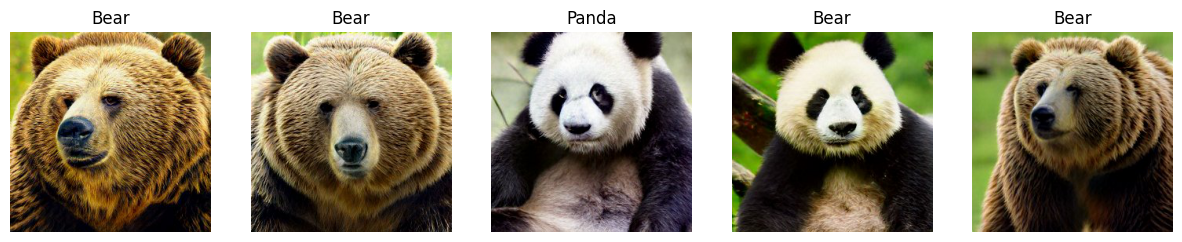

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 1: Load the dataset
os.environ['KAGGLE_USERNAME'] = 'nadamousa'
os.environ['KAGGLE_KEY'] = '4698dd1ddcd81e1d7b8899e0c891b154'

#!kaggle datasets download -d mattop/panda-or-bear-image-classification
#!unzip panda-or-bear-image-classification.zip -d CNN

# Step 2: Apply pre-processing if needed on the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory='/content/CNN/PandasBears/Train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(directory='/content/CNN/PandasBears/Test',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

# Step 3: Define the CNN model
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool2d(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def dense(x, W, b):
    x = tf.reshape(x, [-1, W.get_shape().as_list()[0]])
    x = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(x)

def dropout(x, keep_prob):
    return tf.nn.dropout(x, keep_prob)

def build_model():
    model = tf.keras.Sequential()
    # First Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Second Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Third Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Flattening Layer
    model.add(tf.keras.layers.Flatten())
    # First Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    # Second Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    # Output Layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    return model

model = build_model()

# Step 4: Compile and train the CNN model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Step 5: Show the performance of your model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Step 6: Plot some predictions examples from your dataset
predictions = model.predict(test_generator)

# Plot the first 5 images and their predictions
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    # Choose a random image from the test set
    index = np.random.randint(len(test_generator.filepaths))
    image = plt.imread(test_generator.filepaths[index])
    # Predict whether the image is a panda or a bear
    if predictions[index] < 0.5:
        axs[i].set_title("Bear")
    else:
        axs[i].set_title("Panda")
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
250/250 [==============================] - 38s 143ms/step - loss: 0.6825 - accuracy: 0.5615 - val_loss: 0.6689 - val_accuracy: 0.6090
Epoch 2/20
250/250 [==============================] - 35s 141ms/step - loss: 0.6293 - accuracy: 0.6431 - val_loss: 0.5983 - val_accuracy: 0.6825
Epoch 3/20
250/250 [==============================] - 36s 142ms/step - loss: 0.5896 - accuracy: 0.6911 - val_loss: 0.5554 - val_accuracy: 0.7245
Epoch 4/20
250/250 [==============================] - 35s 140ms/step - loss: 0.5643 - accuracy: 0.7134 - val_loss: 0.5459 - val_accuracy: 0.7320
Epoch 5/20
250/250 [==============================] - 35s 141ms/step - loss: 0.5426 - accuracy: 0.7254 - val_loss: 0.5094 - val_accuracy: 0.7515
Epoch 6/20
250/250 [==============================] - 35s 141ms/step - loss: 0.5072 - accuracy: 0.7486 - val_loss: 0.5147 - val_accuracy: 0.7570
Epoch 7/20
250/250 [==========================

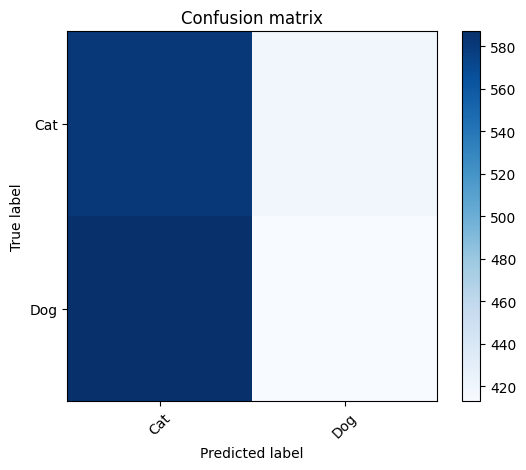

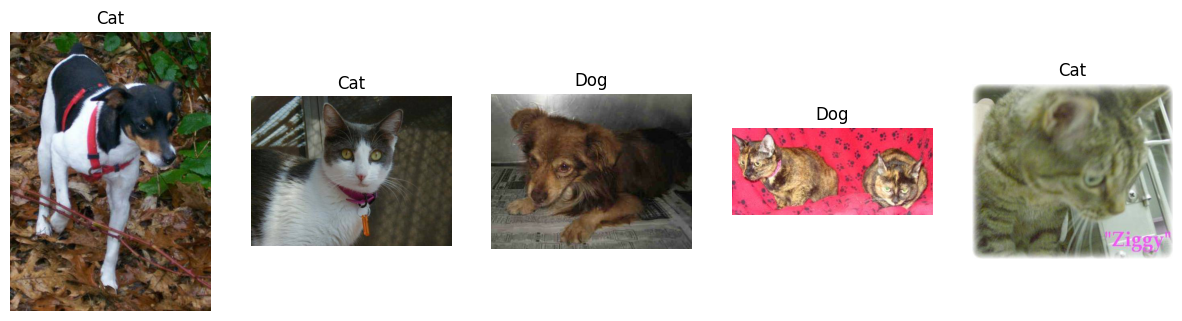

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Load the dataset
os.environ['KAGGLE_USERNAME'] = 'nadamousa'
os.environ['KAGGLE_KEY'] = '4698dd1ddcd81e1d7b8899e0c891b154'

#!kaggle datasets download -d mattop/panda-or-bear-image-classification
#!unzip panda-or-bear-image-classification.zip -d CNN

# Step 2: Apply pre-processing if needed on the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory='/content/catVdog/dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(directory='/content/catVdog/dataset/test_set',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

# Step 3: Define the CNN model
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool2d(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def dense(x, W, b):
    x = tf.reshape(x, [-1, W.get_shape().as_list()[0]])
    x = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(x)

def dropout(x, keep_prob):
    return tf.nn.dropout(x, keep_prob)

def build_model():
    model = tf.keras.Sequential()
    # First Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Second Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Third Convolutional Layer
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    # Flattening Layer
    model.add(tf.keras.layers.Flatten())
    # First Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    # Second Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    # Output Layer
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    return model

model = build_model()

# Step 4: Compile and train the CNN model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Step 5: Show the performance of your model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Step 6: Plot some predictions examples from your dataset
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.round(predictions)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Cat', 'Dog'], rotation=45)
plt.yticks(tick_marks, ['Cat', 'Dog'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot some prediction examples
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    # Choose a random image from the test set
    index = np.random.randint(len(test_generator.filepaths))
    image = plt.imread(test_generator.filepaths[index])
    # Predict whether the image is a panda or a bear
    if predictions[index] < 0.5:
        axs[i].set_title("Cat")
    else:
        axs[i].set_title("Dog")
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()